# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：0205_m3-2

1. 4個變數：隔夜拆款利率、臺北市人口數、臺北市核發建築物建造執照H類住宅總計、房價指數

2. Lag = 4

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{population}\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0\\
a_{21} &a_{22} &0 &0\\
a_{31} &a_{32} &a_{33} &0\\
a_{41} &a_{42} &a_{43} &a_{44}\\
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hd}\\
	e_t^{hs}\\
	e_t^{sp}
\end{array}
\right]
$$

### 環境設定

In [1]:
# 設定路徑
#Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
#setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Loading required package: matrixcalc

Loading required package: lattice



In [2]:
options(warn=-1)    # 關掉warning
#options(warn=0)
options(scipen=999) #不要科學記號

### 讀資料

In [3]:
###### 讀取資料 ######
file = "data/df_TPE.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 4-variable model
By <- data %>% select(interest_rate, population, permit_count_house, hp) %>% as.matrix

# Raw Data

In [4]:
dim(By)

[1] 111   4

In [5]:
data$Date <- as.Date(data$Date)

In [6]:
i_level <- ggplot(data, aes(x = Date, y = interest_rate))+
    geom_line()

permit_level <- ggplot(data, aes(x = Date, y = permit_count_house))+
    geom_line()

population_level <- ggplot(data, aes(x = Date, y = population))+
    geom_line()

sentiment_level <- ggplot(data, aes(x = Date, y = Sentiment))+
    geom_line()

hp_level <- ggplot(data, aes(x = Date, y = hp))+
    geom_line()

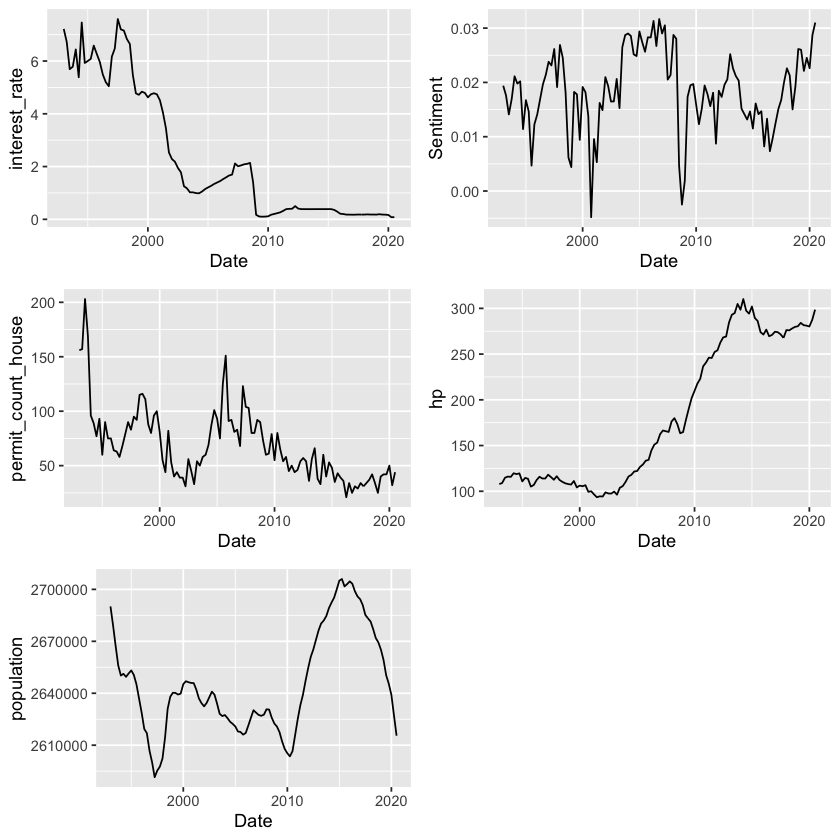

In [7]:
multiplot(i_level,permit_level,
          population_level, sentiment_level,
          hp_level,
          cols = 2)

In [8]:
ggsave(filename = "raw.png", 
       plot = multiplot(i_level,
                        population_level, permit_level,
                        hp_level,
                        cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

### 模型設定

In [9]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [10]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.8490085,-0.00001014740,0.001721883,0.01758624,0.15551800,0.000008540535,-0.001917741,-0.01637502,3.933323
899.8258545,1.76529307678,11.180159838,-36.81961094,-845.84682426,-0.800805981828,3.648891115,48.13528889,90780.231850
8.1174481,-0.00011916671,0.644848154,0.33362155,-7.32051699,0.000071120194,0.069803429,-0.36889371,149.555650
-1.0096665,-0.00009463118,-0.026379136,0.94305817,-0.09040007,0.000017131696,0.058818457,0.06263323,206.112225


0.165557050,99.67922,-0.4818263,0.003095296
99.679221738,9521153.32913,-5311.1882452,-490.097560372
-0.481826280,-5311.18825,295.3762501,1.913544836
0.003095296,-490.09756,1.9135448,26.295621538


0.151887202,91.44883,-0.4420425,0.002839721
91.448827283,8735003.05425,-4872.6497663,-449.630789332
-0.442042459,-4872.64977,270.9873854,1.755545721
0.002839721,-449.63079,1.7555457,24.124423429


### AIC/SIC

In [11]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 22.862

AIC,24.49565,23.52256,23.20398,23.28165
SIC,24.98665,24.41144,24.49537,24.98027
HQ,24.69480,23.88303,23.72759,23.97024


AIC SIC  HQ 
  3   2   3

### 選擇lag期數

In [12]:
# 依據AIC選擇
VAR.P = 4

# SVAR

## Identification

In [13]:
### 4-variable model

Amat = diag(4)
# Identification Conditions

Amat[2,1]  = NA; 
Amat[3,1]  = NA; Amat[3,2]  = NA;
Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,3]  = NA;

Bmat = diag(4)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0
NA,1,0,0
NA,NA,1,0
NA,NA,NA,1


NA,0,0,0
0,NA,0,0
0,0,NA,0
0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

* Recall 模型設定:

$$D(L)Y_t = Be_t$$

可以推得:

$$Y_t = \Phi_1 Y_{t-1} + \dots + \Phi_p Y_{t-p} + \varepsilon_t $$

1. 為 $A, B$ matrix 加上 zero constraints

2. 從$\Sigma_\varepsilon = CC'$知道 cholesky decomposition的 $C = (I-D_0)^{-1}B = A^{-1}B$ 

In [14]:
C.Prime <- chol(Sigma.OLS)

In [15]:
C <- t(C.Prime)
C

0.406887024,0.0000000,0.00000000,0.000000
244.980094800,3075.8963055,0.00000000,0.000000
-1.184177061,-1.6323985,17.06778398,0.000000
0.007607262,-0.1599408,0.09734516,5.124501


令 

$$
A = \left[
\begin{array}{ccccc}
1 &0 &0 &0\\
a_{21} &1 &0 &0\\
a_{31} &a_{32} &1 &0\\
a_{41} &a_{42} &a_{43} &1\\
\end{array}
\right]
$$

$$
B = \left[
\begin{array}{ccccc}
\sigma_1 &0 &0 &0\\
0 &\sigma_2 &0 &0\\
0 &0 &\sigma_3 &0\\
0 &0 &0 &\sigma_4\\
\end{array}
\right]
$$

### Note: Solving system of linear equations

由於 $B, C$已知，又$AC = B$，故$A = BC^{-1}$

In [16]:
B0 <- diag(diag(C), ncol = 4, nrow = 4)
B0

0.406887,0.000,0.00000,0.000000
0.000000,3075.896,0.00000,0.000000
0.000000,0.000,17.06778,0.000000
0.000000,0.000,0.00000,5.124501


In [17]:
A0 <- B0 %*% solve(C)
A0

1.00000000,-0.0000000000000000003687935,0.000000000,0
-602.08382250,1.0000000000000002220446049,0.000000000,0
2.59080394,0.0005307066013640304421098,1.000000000,0
-0.06477997,0.0000489712426866926913761,-0.005703444,1


In [18]:
SVAR_AB_est <- list("A0.svar" = A0, "B0.svar" = B0)

## IRF (without Bootstrap C.I.)

In [19]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 16) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:4){
    for(i in 1:4){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

In [20]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))

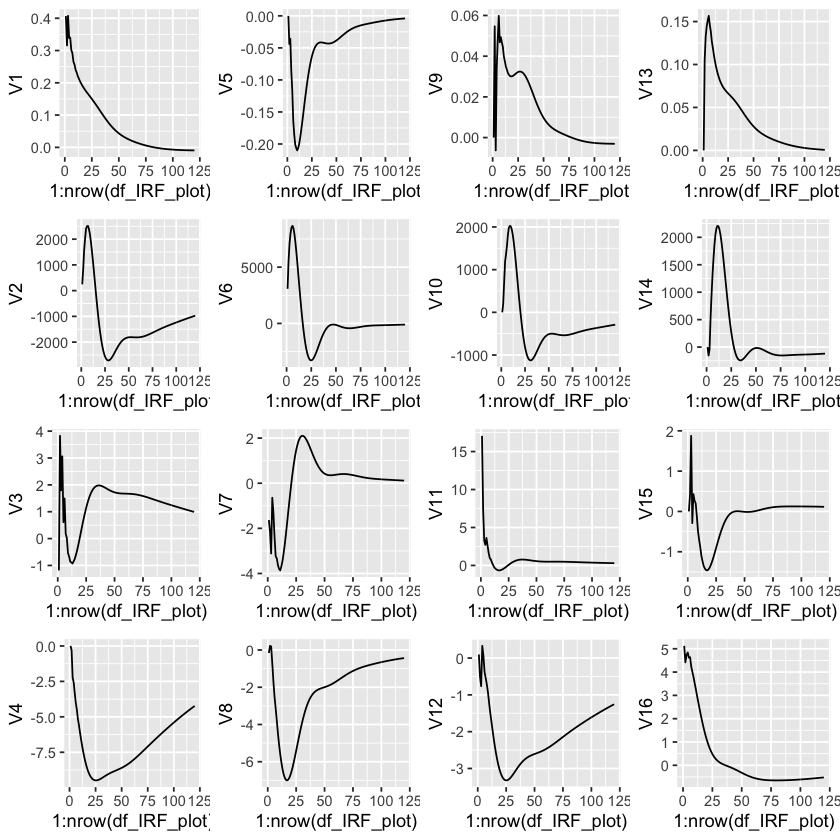

In [21]:
multiplot(p1,p2,p3,p4,
          p5,p6,p7,p8,
          p9,p10,p11,p12,
          p13,p14,p15,p16,
          cols = 4)

* 看(row4,col2)
    
    * hd shock對hp的影響是負的 -> 不合理
    

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

In [22]:
#```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)

# dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 16 coef if 4 variables; 55 coef if 5 variables
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU
BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}

Theta.unit= VAR.Theta(Coef, h, BSigma.u, CONST)$unit # 估算 Theta.unit
Theta.std = VAR.Theta(Coef, h, BSigma.u, CONST)$std  # 估算 Theta.std

# dm.U <- U-mean(U)
dm.U <- U

N = 1000 #重抽次數
Theta.unit.sim = vector("list", N)
Theta.std.sim  = vector("list", N)

dim(ddX); dim(Coef.noc); dim(dm.U)


# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,kk^2,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){

  #cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ] #initial values

  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]

    # predicted values given the above initial values
    last.y= c(t(By[VAR.P:1,]))
    for(ii in 1:T){
         last.y = last.y[1:(kk*VAR.P)]
         Y.sim[ii+VAR.P, ] = Coef.noc %*% last.y + const + U.sim[ii,]      # Step 4 模擬資料
         last.y = c(Y.sim[ii+VAR.P,], last.y)
      }
  
#   Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = T.total-VAR.P, ncol = kk, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  
    
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###

    Y_pseudo     = VAR.Y(Y.sim, VAR.P)        # 設定 Y
    X_pseudo     = VAR.X(Y.sim, VAR.P)        # 設定 X
    Coef.OLS_pseudo    = VAR.OLS(Y_pseudo, X_pseudo, CONST)
    Sigma.OLS_pseudo   = VAR.Sigma.OLS(Y_pseudo, X_pseudo, Coef.OLS_pseudo, CONST)
    C.Prime_pseudo <- chol(Sigma.OLS_pseudo)
    C_pseudo <- t(C.Prime_pseudo)
    B0_pseudo <- diag(diag(C_pseudo), ncol = 4, nrow = 4)
    A0_pseudo <- B0_pseudo %*% solve(C_pseudo)
    SVAR_AB_est.sim <- list("A0.svar" = A0_pseudo, "B0.svar" = B0_pseudo)
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
    
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, kk^2) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:kk){
      for(i in 1:kk){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
#```

[1] 107  16

[1]  4 16

[1] 107   4

In [23]:
#```R
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_0205_m3-2.rds")
#```

In [24]:
df_IRF.sim <- read_rds("df_IRF.sim_0205_m3-2.rds")

In [25]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.4068870,244.9801,-1.1841771,0.007607262,0.000000000000001134371,3075.896,-1.6323985,-0.1599408,0.00000000,0.0000,17.067784,0.09734516,0.00000000,0.00000,0.00000000,5.124501
0.2940037,238.0736,5.3757754,0.191783120,0.000668597072311745075,5188.382,-1.3033042,-0.1747222,0.05524068,594.1241,4.374571,-0.11012668,0.07458645,-25.79253,2.50891112,3.670377
0.4176107,592.1920,2.3976103,-1.850120644,-0.031369409435465414604,5631.606,-2.6617796,-0.1024040,-0.04707411,1272.5540,2.271750,0.91846289,0.07803603,535.85907,3.05683417,3.742036
0.3335275,781.8337,4.0314721,-1.668889076,-0.055337677845652570585,5642.598,1.0799302,-1.1804766,0.09351341,1462.9089,-2.452604,1.86490579,0.10590239,1284.05486,-0.30318995,3.726081
0.3543640,1091.8566,0.5893367,-2.334317239,-0.045139023641073874882,5665.544,0.2789178,-1.8642671,0.07349793,1653.3771,2.860714,1.65244040,0.07152924,1687.03207,0.33342737,3.868728
0.2947812,1429.9327,2.9945340,-2.771194434,-0.066799844912944369990,5407.306,-1.7426511,-2.0627320,0.14521347,2257.7059,1.383113,0.75309752,0.08663434,2064.55189,0.09747203,3.467168


### 畫IRF & Bootstrap C.I.

In [26]:
df_IRF_plot.BS.L <- matrix(NA, 120, 16)
df_IRF_plot.BS.U <- matrix(NA, 120, 16)
df_IRF_plot.BS.Median <- matrix(NA, 120, 16)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 16)
for(col in 1:16){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

In [28]:
ind <- 0
for(i in 1:4){
  for(j in 1:4){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind],
                          df_IRF_plot[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean', 'Actual')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") +geom_hline(yintercept=0, color = 'grey')+ geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Actual), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4
* V1 -> V1...5

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4
* V2 -> V2...5

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4
* V3 -> V3...5

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4
* V4 -> V4...5

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4
* V5 -> V5...5

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4
* V6 -> V6...5

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4
* V7 -> V7...5

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4
* V8 -> V8...5

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4
* V9 -> V9...5

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4
* V10 -> V10...5

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4
* V11 -> V11...5

New names:
* V12 -> V12

In [29]:
Text_Size_Theme = theme(
  axis.title.x = element_text(size = 12),
  axis.text.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.title = element_text(size = 12),
  plot.title = element_text(size=12))

## shock1
p1 <- p1+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Monetary Policy Shock')+Text_Size_Theme
p2 <- p2+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Population to Monetary Policy Shock')+Text_Size_Theme
p3 <- p3+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Monetary Policy Shock')+Text_Size_Theme
p4 <- p4+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Monetary Policy Shock')+Text_Size_Theme

## shock2
p5 <- p5+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Demand Shock')+Text_Size_Theme
p6 <- p6+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Population to Housing Demand Shock')+Text_Size_Theme
p7 <- p7+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Demand Shock')+Text_Size_Theme
p8 <- p8+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Demand Shock')+Text_Size_Theme

## shock3
p9 <- p9+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Supply Shock')+Text_Size_Theme
p10 <- p10+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Population to Housing Supply Shock')+Text_Size_Theme
p11 <- p11+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Supply Shock')+Text_Size_Theme
p12 <- p12+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Supply Shock')+Text_Size_Theme

## shock4
p13 <- p13+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Speculation Shock')+Text_Size_Theme
p14 <- p14+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Population to Housing Speculation Shock')+Text_Size_Theme
p15 <- p15+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Speculation Shock')+Text_Size_Theme
p16 <- p16+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Speculation Shock')+Text_Size_Theme

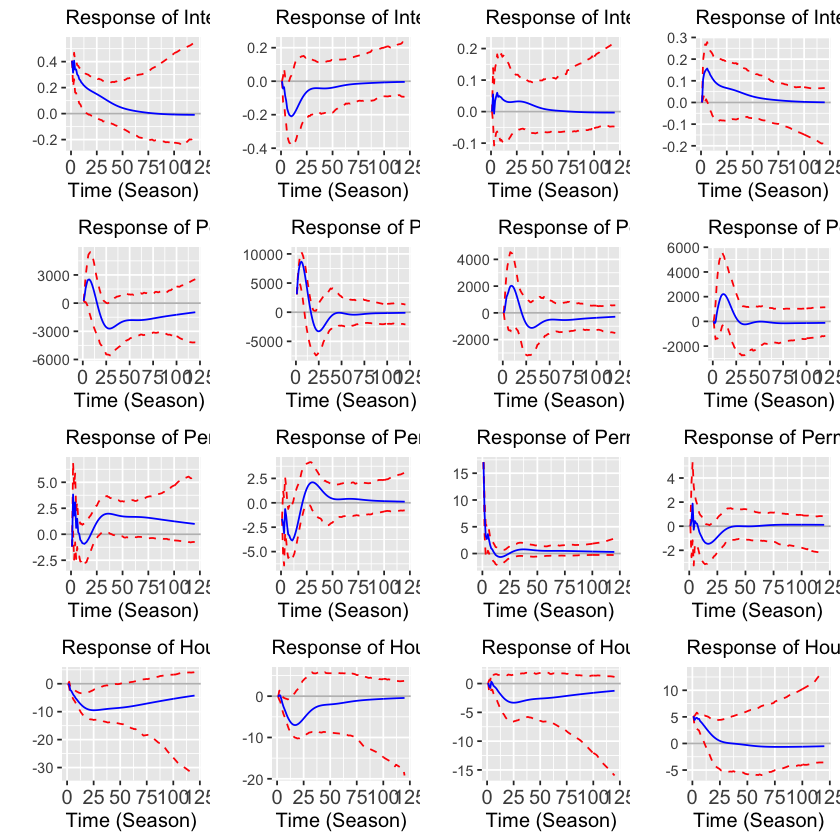

In [30]:
multiplot(p1,p2,p3,p4,
          p5,p6,p7,p8,
          p9,p10,p11,p12,
          p13,p14,p15,p16,
          cols = 4)

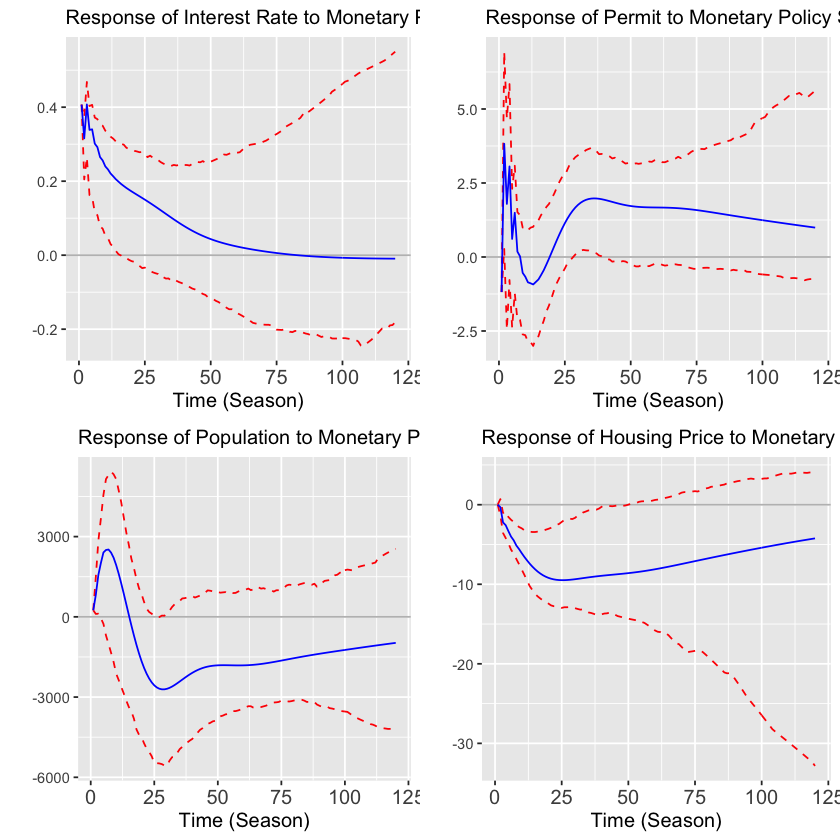

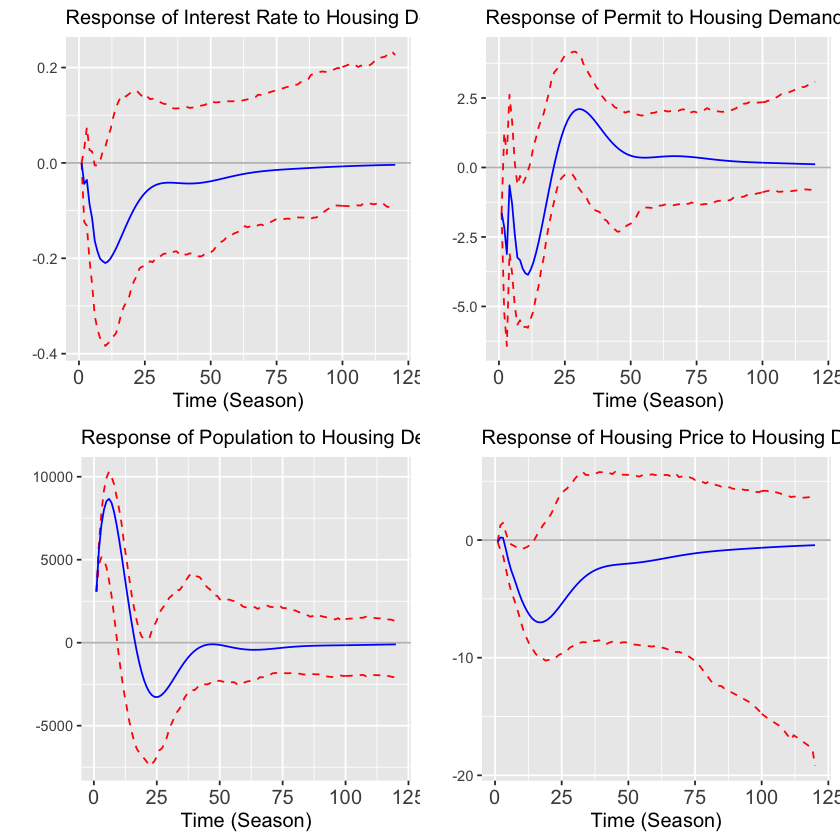

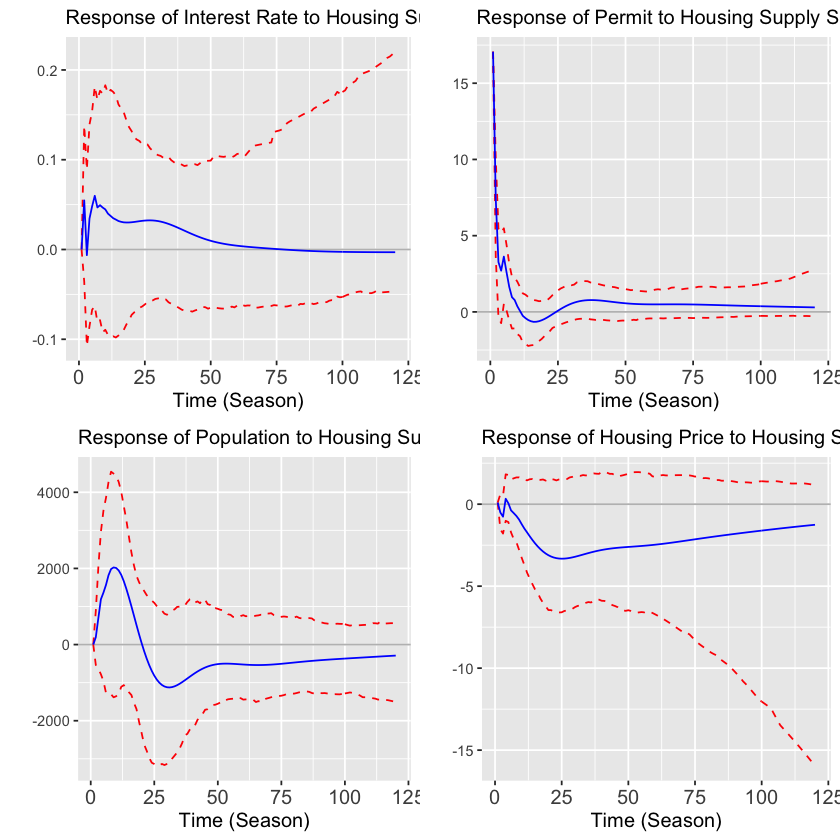

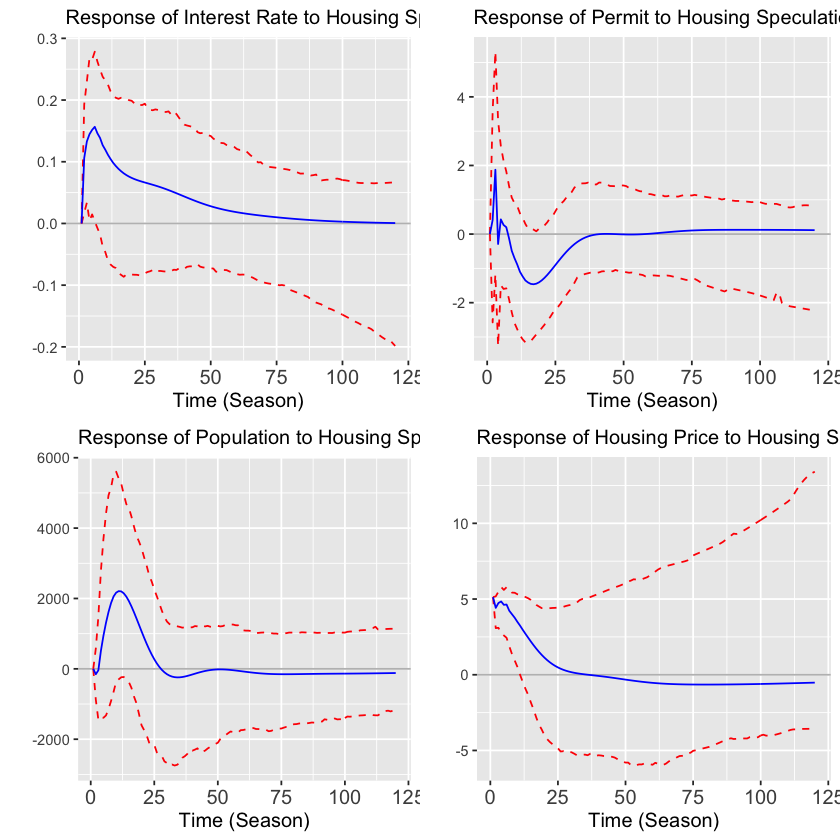

In [31]:
# For shock 1
multiplot(p1,p2,p3,p4,
          cols = 2)
# For shock 2
multiplot(p5,p6,p7,p8,
          cols = 2)
# For shock 3
multiplot(p9,p10,p11,p12,
          cols = 2)
# For shock 4
multiplot(p13,p14,p15,p16,
          cols = 2)

In [32]:
# save plot
# shock 1
ggsave(filename = "result/figure/0205_m3-2-chol_IRF_shock1.png", 
       plot = multiplot(p1,p2,p3,p4, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 2
ggsave(filename = "result/figure/0205_m3-2-chol_IRF_shock2.png", 
       plot = multiplot(p5,p6,p7,p8, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 3
ggsave(filename = "result/figure/0205_m3-2-chol_IRF_shock3.png", 
       plot = multiplot(p9,p10,p11,p12, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 4
ggsave(filename = "result/figure/0205_m3-2-chol_IRF_shock4.png", 
       plot = multiplot(p13,p14,p15,p16, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

## Variance Decomposition

In [33]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 4, By, VAR.P,
                                       AMat, BMat, h=120,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
head(SVAR_AB_VarDecomp*100)
tail(SVAR_AB_VarDecomp*100)

h=1,0.0002200763,0.09728253,0.03603672,99.86646
h=2,0.2094951534,0.16246875,0.58184737,99.04619
h=3,6.8093471745,0.15025158,1.14609885,91.89430
h=4,11.1516130816,0.60363006,0.91559710,87.32916
h=5,16.1847541227,2.53038308,0.68782600,80.59704
h=6,21.0219997320,5.38954430,0.60062884,72.98783


h=115,76.67550,12.61099,7.365047,3.348460
h=116,76.71116,12.57936,7.366551,3.342932
h=117,76.74577,12.54863,7.368001,3.337594
h=118,76.77937,12.51879,7.369401,3.332439
h=119,76.81198,12.48981,7.370752,3.327461
h=120,76.84363,12.46166,7.372055,3.322652


In [34]:
# table
SVAR_VD <- (SVAR_AB_VarDecomp*100) %>% as.tibble()
SVAR_VD <- SVAR_VD %>% filter(row_number(V1) %in% c(1,2,4,8,12,20,40,60,80,120)) %>%
    mutate(period = c(1,2,4,8,12,20,40,60,80,120)) %>%
    select(period = period,
           mp = V1,
           hd = V2,
           hs = V3,
           sp = V4) %>%
    mutate(period = as.character(period),
           mp = round(mp, digits = 2),
           hd = round(hd, digits = 2),
           hs = round(hs, digits = 2),
           sp = round(sp, digits = 2))
SVAR_VD

period,mp,hd,hs,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.10,0.04,99.87
2,0.21,0.16,0.58,99.05
4,11.15,0.60,0.92,87.33
8,29.36,11.89,0.66,58.10
12,39.73,24.06,1.53,34.69
20,49.65,31.56,3.95,14.84
40,64.51,22.58,6.62,6.29
60,71.27,17.22,7.06,4.45
80,74.39,14.60,7.26,3.76


In [35]:
library(xtable)

In [36]:
tab_VD <- xtable(SVAR_VD, caption= "房價指數的變異數分解", align=c("c","c","c","c","c","c"))
print(tab_VD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 10:04:14 2021
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
period & mp & hd & hs & sp \\ 
  \hline
1 & 0.00 & 0.10 & 0.04 & 99.87 \\ 
  2 & 0.21 & 0.16 & 0.58 & 99.05 \\ 
  4 & 11.15 & 0.60 & 0.92 & 87.33 \\ 
  8 & 29.36 & 11.89 & 0.66 & 58.10 \\ 
  12 & 39.73 & 24.06 & 1.53 & 34.69 \\ 
  20 & 49.65 & 31.56 & 3.95 & 14.84 \\ 
  40 & 64.51 & 22.58 & 6.62 & 6.29 \\ 
  60 & 71.27 & 17.22 & 7.06 & 4.45 \\ 
  80 & 74.39 & 14.60 & 7.26 & 3.76 \\ 
  120 & 76.84 & 12.46 & 7.37 & 3.32 \\ 
   \hline
\end{tabular}
\caption{房價指數的變異數分解} 
\end{table}


In [37]:
print(tab_VD, file="result/table/0205_m3-2-chol.tex",
      include.rownames=FALSE,
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_VD),by=1))

## Historical Decomposition

In [38]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 111  16

In [39]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

9,7.217000,2690151,156.00000,107.8000
10,6.725333,2679284,157.00000,109.0800
11,5.692000,2667304,203.00000,114.8400
12,5.783333,2655984,169.00000,116.0600
,5.892857,2648551,110.93380,117.3352
,6.120274,2644788,91.82884,122.5304


[1] 111   4

[1] 111   4

In [40]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,population,permit_count_house,hp
9,0.0000000,0.000,0.000000,0.000000
10,0.0000000,0.000,0.000000,0.000000
11,0.0000000,0.000,0.000000,0.000000
12,0.0000000,0.000,0.000000,0.000000
13,0.5454761,1684.242,-14.933802,-1.625215
14,-0.7332739,6431.806,-2.828838,-2.850386


In [41]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,5,9,13)])

NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
0.5454761,328.4223,-1.587518,0.01019836
-0.6425338,460.5403,8.228645,-0.43688062


In [42]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
tail(cbind((By-SVAR_AB_Hist.c0)[,4], 
      (SVAR_AB_HistDecomp[,c(1,5,9,13)])[,4]))

114,-39.32389,-5.493114
115,-44.03105,-5.202594
116,-46.78514,-4.812884
117,-49.91620,-3.899597
118,-44.83426,-3.495037
119,-35.82938,-3.007946


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



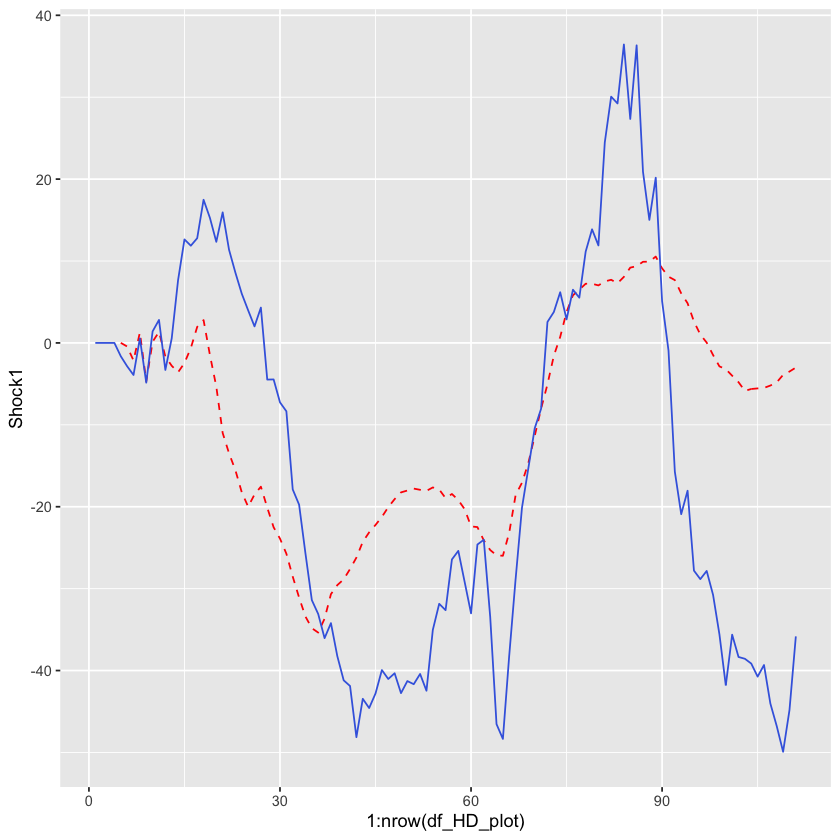

In [43]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(1,5,9,13)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')



### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



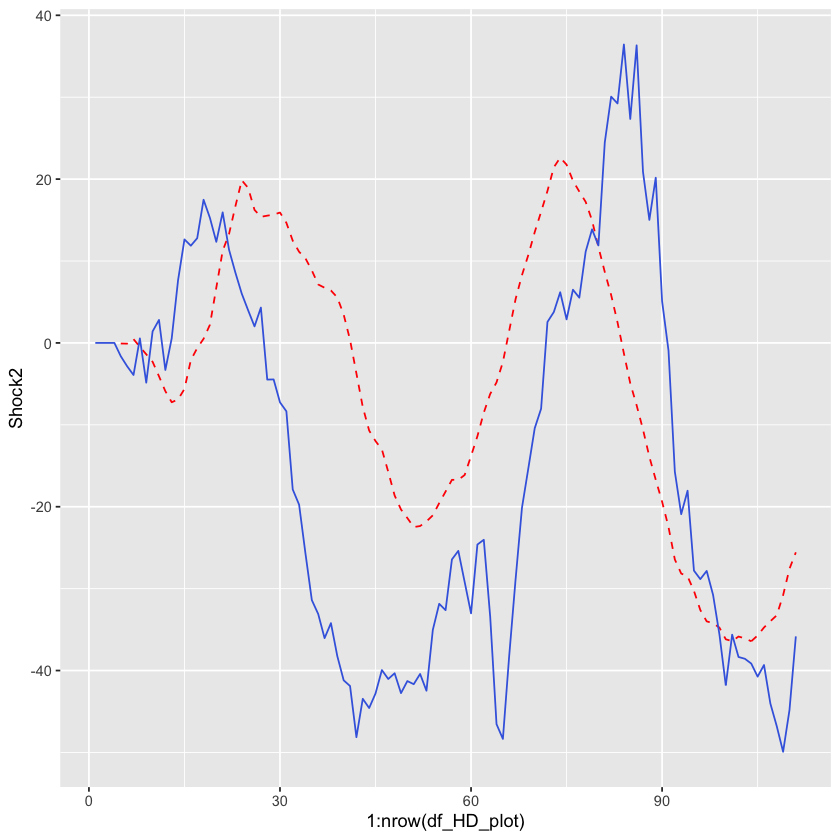

In [44]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(2,6,10,14)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



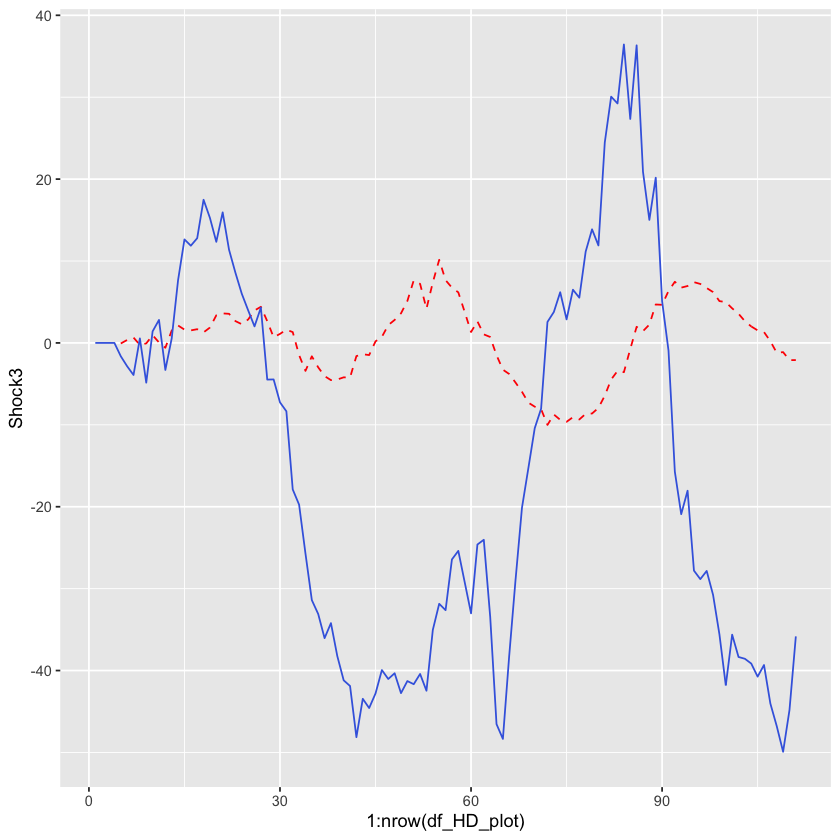

In [45]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(3,7,11,15)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



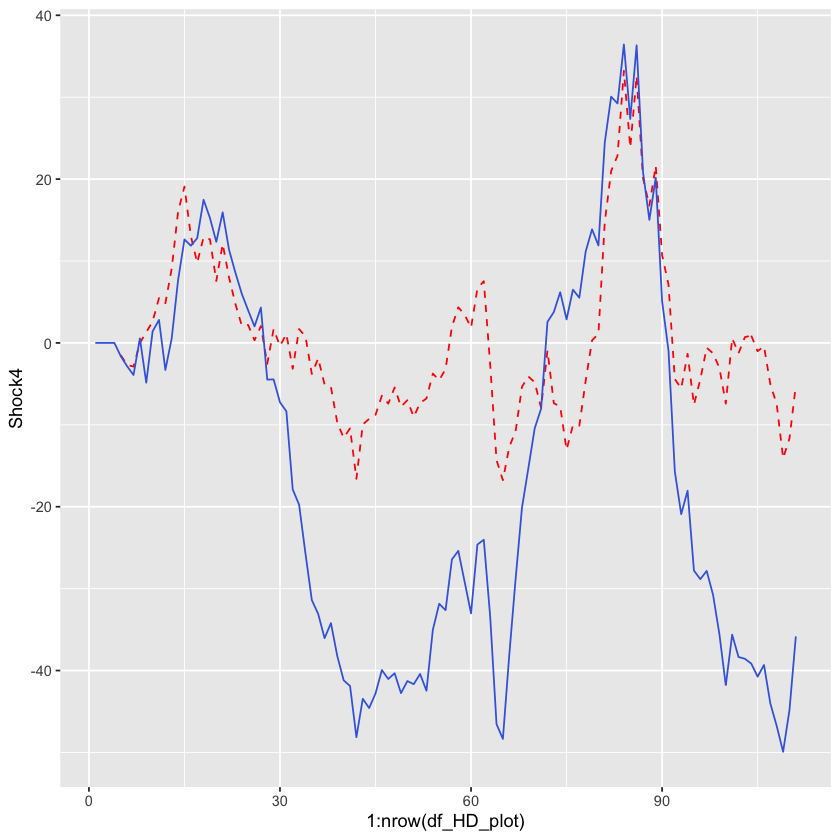

In [46]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(4,8,12,16)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### Table

In [47]:
t_label <- c()
year_label <- c()
season_label <- c()
year <- 1993
for(q in 1:111){
    if(q%%4==0){
        t_label <- c(t_label, paste0(year, "Q4", sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, 4)
        year <- year+1
    }else{
        t_label <- c(t_label, paste0(year, "Q", q%%4, sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, q%%4)
    }
}

In [48]:
df_HD <- bind_cols(t_label,
                   year_label,
                   season_label,
                   (By-SVAR_AB_Hist.c0)[,4],
                   SVAR_AB_HistDecomp[,13],
                   SVAR_AB_HistDecomp[,14],
                   SVAR_AB_HistDecomp[,15],
                   SVAR_AB_HistDecomp[,16])
colnames(df_HD) <- c("Time", "Year", "Season", "BaseLine", "mp", "hd", "hs", "sp")
tail(df_HD)

New names:
* NA -> ...1
* NA -> ...2
* NA -> ...3
* NA -> ...4
* NA -> ...5
* ...



Time,Year,Season,BaseLine,mp,hd,hs,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019Q2,2019,2,-39.32389,-5.493114,-34.74468,1.3265848,-0.4127924
2019Q3,2019,3,-44.03105,-5.202594,-33.97933,0.2112904,-5.0605302
2019Q4,2019,4,-46.78514,-4.812884,-33.25782,-1.2067427,-7.5078170
2020Q1,2020,1,-49.91620,-3.899597,-30.80220,-1.1247230,-14.0897950
2020Q2,2020,2,-44.83426,-3.495037,-27.57803,-2.1014147,-11.6598964
2020Q3,2020,3,-35.82938,-3.007946,-25.56664,-2.0949178,-5.1599927


In [49]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hd = hd/BaseLine*100,
                    hs = hs/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = median(mp),
          hd = median(hd),
          hs = median(hs),
          sp = median(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hd = hd/BaseLine*100,
                    hs = hs/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = median(mp),
          hd = median(hd),
          hs = median(hs),
          sp = median(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hd = hd/BaseLine*100,
                    hs = hs/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year>=2003) %>%
summarise(mp = median(mp),
          hd = median(hd),
          hs = median(hs),
          sp = median(sp))

In [50]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3)
HD.table <- bind_cols(c("全樣本(1993Q1-2020Q3)","房價持平期(1993Q1-2002Q4)","房價上升期(2003Q1-2020Q3)"), HD_seq)
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock", 
                        "Housing Demand Shock",
                        "Housing Supply Shock",
                        "Housing Speculation Shock")
HD.table

New names:
* NA -> ...1



樣本期間,Montary Policy Shock,Housing Demand Shock,Housing Supply Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1993Q1-2020Q3),47.29087,38.36506,-2.738754,18.06212
房價持平期(1993Q1-2002Q4),31.94710,-16.10465,11.989520,51.36198
房價上升期(2003Q1-2020Q3),47.29087,55.31737,-9.290888,16.04744


In [51]:
# 生出table
tab_HD <- xtable(HD.table, caption= "歷史分解下各衝擊的解釋力比率(%)", align=c("c","c","c","c","c","c"))
print(tab_HD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 10:04:16 2021
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
樣本期間 & Montary Policy Shock & Housing Demand Shock & Housing Supply Shock & Housing Speculation Shock \\ 
  \hline
全樣本(1993Q1-2020Q3) & 47.29 & 38.37 & -2.74 & 18.06 \\ 
  房價持平期(1993Q1-2002Q4) & 31.95 & -16.10 & 11.99 & 51.36 \\ 
  房價上升期(2003Q1-2020Q3) & 47.29 & 55.32 & -9.29 & 16.05 \\ 
   \hline
\end{tabular}
\caption{歷史分解下各衝擊的解釋力比率(%)} 
\end{table}


In [52]:
print(tab_HD, include.rownames=FALSE,
      file="result/table/0205_m3-2-chol_HD.tex",
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_HD),by=1))

### Save Plot

In [53]:
xlab <- lubridate::yq(df_HD$Time)

In [54]:
# plot 1
figure_HD.1 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = mp, color = "Monetary Policy Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Monetary Policy Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('royalblue','red'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 2
figure_HD.2 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hs, color = "Housing Demand Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Demand Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 3
figure_HD.3 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hd, color = "Housing Supply Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Supply Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 4
figure_HD.4 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = sp, color = "Housing Speculation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Speculation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [55]:
# save shock 1
ggsave(filename = "result/figure/0205_m3-2-chol_HD_shock1.png", 
       plot = figure_HD.1,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 2
ggsave(filename = "result/figure/0205_m3-2-chol_HD_shock2.png", 
       plot = figure_HD.2,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 3
ggsave(filename = "result/figure/0205_m3-2-chol_HD_shock3.png", 
       plot = figure_HD.3,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 4
ggsave(filename = "result/figure/0205_m3-2-chol_HD_shock4.png", 
       plot = figure_HD.4,
       width = 15, height = 10, units = "cm",
       device = "png")